<h1 style="text-align:center;">Numerical Resolution of Non-Homogeneous Differential Equations</h1>

<h2>Introduction</h2>

<p style="text-align: justify; text-indent:4em">
Several phenomena of science, engineering, economics and nature (in general) can be described / modeled by differential equations. "In summary, a numerical methods provide approximations for the solution of these differential equations. In this case, the differential equation is an equation involving an unknown function and its derivatives. [1] In many cases, the analytical resolution of the equations is extremely costly or impracticable.
</p>
<p style="text-align: justify; text-indent:4em">
An Ordinary Differential Equation (ODE) is the DE whose unknown incognito function depends on a single independent variable. Thus, only ordinary derivatives are found in these equations [2]. An ODE can be classified in relation to its order. For example, if an ODE has as a second derivative a second derivative, it is said to be an ODE of order 2. These equations have a general solution and also particular solutions, which depend on the "initial conditions". For a first-order ODE, only an initial condition is required. Similarly, a third order ODE requires three initial conditions for a particular solution to be found. The image below shows how a single ODE can have several particular solutions that depend precisely on the initial conditions.
</p>
<center><img src="img/edo.png"></center>
<center style="margin-top:6px; font-size:12px; font-weight:bold; margin-top:-20px">
Solutions for an ODE
</center>

<h2>Numerical methods</h2>
<p style="text-align: justify; text-indent:4em">
The methods developed in this work are based on the Taylor Series. In general, it is a series that expresses an analytic function f in terms of a sum of powers, so that the first values of the series have a greater contribution, that is, as the continuous summation, the new terms begin to contribute less in the approximation of the series at a given point. The equation below represents the Taylor series around the point <i>a</i>.
</p>
\begin{align*}
f(x) = \sum_{i=0}^N \frac {f^{(n)}(a)}{n!}\ (x-a)^{n}\ 
\end{align*}
<center style="margin-top:6px; font-size:13px; font-weight:bold">
Taylor Serie
</center>
<h3>Euler Method</h3>
<p style="text-align: justify; text-indent:4em">
The Euler method is described by the equation below. It is known as the tangent method and can be obtained as part of Taylor's 1st order polynomial. It is the most basic explicit method of solving EDO's, having been developed by Leonhard Euler. As can be seen from the equation below, this method only depends on a previous value, so it is classified as a simple step method.
</p>
<br>
\begin{align*} 
    y_{n+1} = y_n + hf(x_n, y_n) 
\end{align*} 
<center style="margin-top:6px; font-size:13px; font-weight:bold">
Euler Method
</center>
<p style="text-align: justify; text-indent:4em">
Because it is quite simple, it is interesting for initial approximations, but it is not efficient, because to achieve "good" approximations, the interval between the values of the domain must be "very" small, which generates a greater computational effort. The cell below contains the implementation of this method. It is noticed that it has two functions, one that "assembles" the lists with the values of the approximation and the other that returns the prediction - to be summed with the image of the previous element of the domain - according to edo, the previous value of the domain and the image and the interval h between the values of the domain.
</p>

In [1]:
# Euler = Range-Kutta first ordem
def euler_prediction(f: object, x: float, y: float, h: float):
    """
    Function that returns the variation in y - delta y - in a range x to x + h
        : param f: differential equation of the first order of the function ex: y '= 2xy
        : param x: domain value
        : param y: value of the image
        : param h: 'distance' between domain elements
    """
    
    #     
    return h*f(x, y)


def calculate_by_euler(f: object, x0: float, y0: float, h: float, n: int):
    """
    Function that returns two list: one with its domain and another with its image, by the method from euler
        : param f: differential equation of the first order of the function ex: y '= 2xy
        : param x0: initial value of the domain
        : param y0: value of the initial value of the domain
        : param h: 'distance' between domain elements
        : param n: number of total elements in each set - image and domain
    """
    
    image = [0]*n
    domain = [0]*n
    image[0] = y0
    domain[0] = x0
    
    aux = x0
    for i in range(n-1):
        image[i+1] = image[i] + euler_prediction(f, domain[i], image[i], h)
        aux += h
        domain[i+1] = aux 
    
    #     
    return domain, image 

<h3>Runge-Kutta Methods</h3>
<p style="text-align: justify; text-indent:4em">
The Runge-Kutta methods were developed around 1900 by two German mathematicians, C. Runge and M. W. Kutta. They are classified as simple but implicit iterative step methods. In this work, Runge-Kutta (RK) methods of second (RK2), third (RK3) and fourth order (RK4) were implemented. RK2 is also known as the Enhanced Euler Method. Normally, when you only speak Runge-Kutta method, it is understood that this is RK4. Below are the expressions of these methods, as well as their implementations.
</p>
<br>
<h4>Improved Euler Method / Second Order Runge-Kutta Method</h4>
<br>
\begin{align*}
f(x) = y_{n} + h\frac{ f(x_{n},y_{n}) + f(x_{n+1},y^*_{n+1}) } {2}\ 
\end{align*}
<center style="margin-top:6px; font-size:13px; font-weight:bold">
Second Order Runge-Kutta Method
</center>
<p style="text-align: justify; text-indent:4em">
therefore:
</p>
\begin{align*} 
    y^*_{n+1} = y_n + hf(x_n, y_n) 
\end{align*} 
<center style="margin-top:6px; font-size:13px; font-weight:bold">
Runge-Kutta Correction Factor of Order 2
</center>
<br>

In [2]:
# Improved Euler Method = Runge-Kutta of ordem 2
def  rk2_prediction(f: object, x: float, y: float, h: float):
    """
    Function that returns the variation in y - delta y - in a range x to x + h through of the improved euler method
        : param f: differential equation of the first order of the function ex: y '= 2xy
        : param x: domain value
        : param y: value of the image
        : param h: 'distance' between domain elements
    """
    
    y_pos = y + h*f(x,y)
    
    #     
    return  h*(( f(x, y) + f(x + h, y_pos)) /2)


def calculate_by_rk2(f: object, x0: float, y0: float, h: float, n: int):
    """
    Function that returns two list: one with its domain and another with its image, by the method of improved euler, the same as Runge Kutta of order 2
        : param f: differential equation of the first order of the function ex: y '= 2xy
        : param x0: initial value of the domain
        : param y0: value of the initial value of the domain
        : param h: 'distance' between domain elements
        : param n: number of total elements in each set - image and domain
    """
    
    # Initial setup
    image = [0]*n
    domain = [0]*n
    image[0] = y0
    domain[0] = x0
    
    aux = x0
    for i in range(n-1):
        aux += h
        domain[i+1] = aux 
        image[i+1] = image[i] + rk2_prediction(f, domain[i], image[i], h)
        
    #     
    return domain, image 

<h4>Third Order Runge-Kutta Method</h4>
<br>
\begin{align*} 
\left(
\begin{array}{c}
y_{n+1} = y_n + \frac{h}{6}(k_1 + 4k_2 + k_3)\\
k_1 = f(x_n, y_n)\\
k_2 = f(x_n + \frac{h}{2},  y_n + \frac{h}{2}k_1)\\
k_3 = f(x_n + h,  y_n + 2hk_2 - hk_1)\\
\end{array}
\right)
\end{align*} 
<center style="margin-top:6px; font-size:13px; font-weight:bold">
Third Order Runge-Kutta Method
</center>
<br>

In [3]:
# Range-kutta third order method
def  rk3_prediction(f: object, x: float, y: float, h: float):
    """
    Function that returns the variation in y - delta y - in a range x to x + h through of the method Runge Kutta 3
        : param f: differential equation of the first order of the function ex: y '= 2xy
        : param x: domain value
        : param y: value of the image
        : param h: 'distance' between domain elements
    """
    
    k1 = f(x, y)
    k2 = f(x+(h/2), (y+(h*k1/2)))
    k3 = f(x+h, y+2*h*k2 - h*k1)
    
    #     
    return h/6*(k1 + 4*k2 + k3)


def calculate_by_rk3(f: object, x0: float, y0: float, h: float, n: int):
    """
    Function that returns two lists: one with its domain and another with its image, through the Runge Kutta method of order 3
        : param f: differential equation of the first order of the function ex: y '= 2xy
        : param x0: initial value of the domain
        : param y0: value of the initial value of the domain
        : param h: 'distance' between domain elements
        : param n: number of total elements in each set - image and domain
    """
    
    # Initial setup
    image = [0]*n
    domain = [0]*n
    image[0] = y0
    domain[0] = x0
    
    aux = x0
    for i in range(n-1):
        aux += h
        domain[i+1] = aux 
        image[i+1] = image[i] + rk3_prediction(f, domain[i], image[i], h)
        
    #     
    return domain, image 


<h4>Fourth Order Runge-Kutta Method</h4>
<br>
\begin{align*} 
\left(
\begin{array}{c}
y_{n+1} = y_n + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)\\
k_1 = hf(x_n, y_n)\\
k_2 = hf(x_n + \frac{h}{2},  y_n + \frac{k_1}{2})\\
k_3 = hf(x_n + \frac{h}{2},  y_n + \frac{k_2}{2})\\
k_4 = hf(x_n + h,  y_n + k_3)\\
\end{array}
\right)
\end{align*} 
<center style="margin-top:6px; font-size:13px; font-weight:bold">
Fourth Order Runge-Kutta Method
</center>
<br>

In [4]:
# Range-kutta fourth order method
def  rk4_prediction(f: object, x: float, y: float, h: float):
    """
    Function that returns the variation in y - delta y - in a range x to x + h through of the method Runge Kutta 4
        : param f: differential equation of the first order of the function ex: y '= 2xy
        : param x: domain value
        : param y: value of the image
        : param h: 'distance' between domain elements
    """
    
    k1 = h*f(x, y)
    k2 = h*f(x+(h/2), y+(k1/2))
    k3 = h*f(x+(h/2), y+(k2/2))
    k4 = h*f(x+h, y+k3)
    
    #     
    return 1/6*(k1 + 2*k2 + 2*k3 + k4)


def calculate_by_rk4(f: object, x0: float, y0: float, h: float, n: int):
    """
    Function that returns two lists: one with its domain and another with its image, through the Runge Kutta method of order 4
        : param f: differential equation of the first order of the function ex: y '= 2xy
        : param x0: initial value of the domain
        : param y0: value of the initial value of the domain
        : param h: 'distance' between domain elements
        : param n: number of total elements in each set - image and domain
    """
    
    # Initial setup
    image = [0]*n
    domain = [0]*n
    image[0] = y0
    domain[0] = x0
    
    aux = x0
    for i in range(n-1):
        aux += h
        domain[i+1] = aux 
        image[i+1] = image[i] + rk4_prediction(f, domain[i], image[i], h)
        
    #     
    return domain, image 


<h3>Multiple Steps Method</h3>
<p style="text-align: justify; text-indent:4em">
Conceptually, a numerical method starts from a starting point and then takes a small step forward in time to find the next point in the solution. The process proceeds with subsequent steps to map the solution. One-step methods (such as the Euler method) refer to only an earlier point and its derivative to determine the current value. Methods such as Runge-Kutta take a few intermediate steps (for example, a half-step) to get a higher-order method, but then discard all previous information before taking a second step. Multi-step methods try to gain efficiency by keeping and using the information from the previous steps rather than discarding them. Accordingly, multi-step methods refer to several prior points and derived values. In the case of multi-step linear methods, a linear combination of the previous points and derived values are used. [3]
</p>
<h4>Adam-Bashforth Method</h4>
\begin{align*} 
    y_{n+1} = y_n + \frac{h}{24}[55f(x_n, y_n) - 59f(x_{n-1}, y_{n-1} + 37f(x_{n-2}, y_{n-2} - 9f(x_{n-3}, y_{n-3} )] 
\end{align*} 
<br>

In [5]:
# Adams-Bashforth fourth order method
def  ab4_prediction(f: object, xn: float, yn: float, previous_conditions: list, h: float):
    """
    Function that returns the variation in y - delta y - in a range x to x + h through from the Adams Bashford method of order 4
        : param f: differential equation of the first order of the function ex: y '= 2xy
        : param x: domain value
        : param y: value of the image
        : param conditions_exterior: ex: [[xn_-3, xn_-2, xn_-1], [yn_-3, yn_-2, yn_-1]]
        : param h: 'distance' between domain elements
    """
    
    x_previous = previous_conditions[0]
    y_previous = previous_conditions[1]
    k1 = f(xn,yn)
    k2 = f(x_previous[2], y_previous[2])
    k3 = f(x_previous[1], y_previous[1])
    k4 = f(x_previous[0], y_previous[0])
    
    #     
    return (h/24)*(55*k1 - 59*k2 + 37*k3 - 9*k4)


def calculate_by_ab4(f: object, x0: float, y0: float, h: float, n: int):
    """
    Function that returns two lists: one with its domain and another with its image, through the Method Adams Bashford of order 4
        : param f: differential equation of the first order of the function ex: y '= 2xy
        : param x0: initial value of the domain
        : param y0: value of the initial value of the domain
        : param h: 'distance' between domain elements
        : param n: number of total elements in each set - image and domain
    """
    
    # Initial setup
    image = [0]*n
    domain = [0]*n
    start_conditions = calculate_by_rk4(f, x0, y0, h, 4)
    domain[0:4] = start_conditions[0]
    image[0:4] = start_conditions[1]
    
    previous_conditions = [[],[]]
    aux = domain[3]
    for i in range(3, n-1):
        aux += h
        domain[i+1] = aux 
        previous_conditions[0] = domain[i-3:i]
        previous_conditions[1] = image[i-3:i]
        image[i+1] = image[i] + ab4_prediction(f, domain[i], image[i], previous_conditions, h)
        
    #     
    return domain, image 

<h4>Adam-Bashfort-Moulton Method</h4>
<br>
\begin{align*} 
\left(
\begin{array}{c}
y_{n+1} = y_n + \frac{h}{24}[9f(x_{n+1}, p_{n+1}) + 19f(x_{n}, y_{n} - 5f(x_{n-1}, y_{n-1} + f(x_{n-2}, y_{n-2} )]\\
p_{n+1} = y_n + \frac{h}{24}[55f(x_n, y_n) - 59f(x_{n-1}, y_{n-1} + 37f(x_{n-2}, y_{n-2} - 9f(x_{n-3}, y_{n-3} )] \\
\end{array}
\right)
\end{align*} 
<br>

In [6]:
# Adams-Bashforth-Moulton fourth order method
def  abm4_prediction(f: object, xn: float, yn: float, condicoes: list, h: float):
    """
    Function that returns the variation in y - delta y - in a range x to x + h through of the method Adams Bashford Moulton of order 4
        : param f: differential equation of the first order of the function ex: y '= 2xy
        : param xn: domain value
        : param yn: value of the image
        : param pn: value predicted by ab4
        : param conditions: ex: [[xn_-3, xn_-2, xn_-1], [yn_-3, yn_-2, yn_-1]]
        : param h: 'distance' between domain elements
    """
    
    x_previous = condicoes[0]
    y_previous = condicoes[1]
    
    p_pos = yn + ab4_prediction(f, xn, yn, condicoes, h)
    k_pos = f(xn+h, p_pos)
    k_n = f(xn,yn)
    k_ant1 = f(x_previous[2], y_previous[2])
    k_ant2 = f(x_previous[1], y_previous[1])
    
    #     
    return (h/24)*(9*k_pos + 19*k_n - 5*k_ant1 + k_ant2)


def calculate_by_abm4(f: object, x0: float, y0: float, h: float, n: int):
    """
    Function that returns two lists: one with its domain and another with its image, through the method Adams Bashford Moulton of order 4
        : param f: differential equation of the first order of the function ex: y '= 2xy
        : param x0: initial value of the domain
        : param y0: value of the initial value of the domain
        : param h: 'distance' between domain elements
        : param n: number of total elements in each set - image and domain
    """
    
    # Initial setup
    image = [0]*n
    domain = [0]*n
    start_conditions = calculate_by_rk4(f, x0, y0, h, 4)
    domain[0:4] = start_conditions[0]
    image[0:4] = start_conditions[1]
    
    previous_conditions = [[],[]]
    aux = domain[3]
    for i in range(3, n-1):
        aux += h
        domain[i+1] = aux 
        previous_conditions[0] = domain[i-3:i]
        previous_conditions[1] = image[i-3:i]
        image[i+1] = image[i] + abm4_prediction(f, domain[i], image[i], previous_conditions, h)
    
    #     
    return domain, image 

<p style="text-align: justify; text-indent:4em">
This cell is intended to implement functions that perform some mathematical procedures. One of these functions implemented is to calculate precision based on the relative error between the elements of an original signal and an approximate one, based on Equation 2.
</p>
<br>
\begin{align*}
error =   \left |\frac{Original - aproximated}{Original} \right |
\end{align*}
<center style="margin-top:6px;">
    Equation - Relative error
</center>
<br>
<p style="text-align: justify; text-indent:4em">
Another function implemented is to calculate the standard deviation, which as well as the function of calculating precision, receives two sets of values, returning the value of the deviation based on Equation 3.
</p>
<br>
\begin{align*}
f(x) = \frac{\sqrt{ \sum_{i=0}^N (x_{i}-\bar x)^2 }} {n}\ 
\end{align*}
<center style="margin-top:6px;">
Equation - Standard Deviation
</center>

In [7]:
def calculate_precision(original, aproximated):
    error = 0.0
    number_amount = len(original)
    for i in range(number_amount):
        if original[i] == 0.0:
            original[i] = 0.00000000000000000000001
        error += abs( ((original[i] - aproximated[i]))/original[i] )/number_amount
    
    #     
    return (1.0-error)*100


def calculate_absolute_error(original, aproximated):
    error = 0.0
    number_amount = len(original)
    for i in range(number_amount):
        error += abs(original[i] - aproximated[i])
    
    #     
    return error


def calculate_average(a_list):
    total = 0.0
    for num in a_list:
        total += num 
    
    #     
    return total/len(a_list)


def calculate_standard_deviation(a_list):
    deviation = 0.0
    n = len(a_list)
    media = calculate_average(a_list)
    for num in a_list: 
        deviation += (abs(num - media)**2)/n
    
    #     
    return deviation**(1/2)

<p style="text-align: justify; text-indent:4em">
The functions that follow represent the differential equation and its exact solution used to analyze the developed algorithms. The function edoC </ span>, for example, represents the following differential equation:
</p>
\begin{align*} 
    y^{'} = x^2 - e^{-2x}
\end{align*}
<center style="margin-top:6px; font-size:13px; font-weight:bold">
EDO 1
</center>
<br>
<p style="text-align: justify; text-indent:4em">Which has as an exact solution:</p>
\begin{align*} 
    y(x) = \frac{x^3}{3} + 2e^{-2x}
\end{align*}
<center style="margin-top:6px; font-size:13px; font-weight:bold">
Exact EDO 1 solution
</center>

In [8]:
import numpy as np
import math

# 
e = 2.71828182846


def edoA(x, y):
    return 0.2 * x*y


def equationA_exact(x):
    return e**(0.1*((x**2)-1))


def edoB(x, y):
    return 2*x*y


def equationB_exact(x):
    return np.exp((x**2)-1)


def edoC(x, y):
    return (x**2) - (2*np.exp(-2*x))


def equationC_exact(x):
    return (x**3)/3 + np.exp(-2*x)

<h2>Results</h2>
<p style="text-align: justify; text-indent:4em">
Using the implementation of these methods of numerical resolution of differential equations, one can compare their answers with the answers of the exact solution of each function presented above. Below are graphs of the results obtained for several steps between the values of the domain, as well as tables that show the precision and absolute error of the methods for these "steps"
</p>

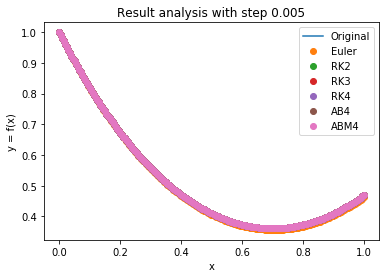

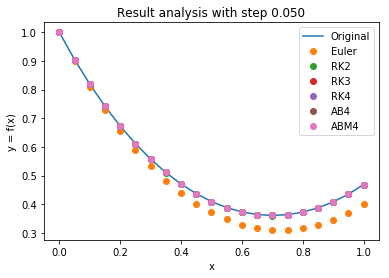

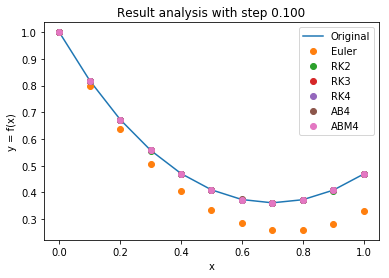

In [11]:
from IPython.core.display import HTML
import matplotlib.pyplot as plt 
import numpy as np


x0 = 0
y0 = 1 
xf = 1.0
edo = edoC
splits = [0.005, 0.05, 0.1]

html = """"""

for h in splits:
    
    n = int(round(np.floor((xf - x0)/h)))+1

    # Exact solution
    exact = []
    for i in range(n): 
        x = x0 + h*i
        y = equationC_exact(x)
        exact.append(y)

    # Use of edoh resolution methods
    t_euler, euler = calculate_by_euler(edo, x0, y0, h, n)
    t_rk2, rk2 = calculate_by_rk2(edo, x0, y0, h, n)
    t_rk3, rk3 = calculate_by_rk3(edo, x0, y0, h, n)
    t_rk4, rk4 = calculate_by_rk4(edo, x0, y0, h, n)
    t_ab4, ab4 = calculate_by_ab4(edo, x0, y0, h, n)
    t_abm4, abm4 = calculate_by_abm4(edo, x0, y0, h, n)

    # Plotting the results
    plt.title('Result analysis with step %.3f' %(h))
    plt.xlabel("x")
    plt.ylabel("y = f(x)")

    _exact, = plt.plot(t_euler, exact, label="Original")
    _euler, = plt.plot(t_euler, euler, 'o', label="Euler")
    _euler_melhorado, = plt.plot(t_rk2, rk2, 'o', label="RK2")
    _rk3, = plt.plot(t_rk3, rk3, 'o', label="RK3")
    _rk4, = plt.plot(t_rk4, rk4, 'o', label="RK4")
    _ab4, = plt.plot(t_ab4, ab4, 'o', label="AB4")
    _abm4, = plt.plot(t_abm4, abm4, 'o', label="ABM4")

    plt.legend(handles=[_exact, _euler, _euler_melhorado, 
                        _rk3, _rk4, _ab4, _abm4])
    plt.show()

    html = html + """
         <table style="border:none">
             <tr style="border:none">
                 <th style="padding:20px; border:none; background-color:#f7f7f7;" colspan="3">
                 <center> h = %.3f </center> """ %h + """
                 </th>
             </tr>
             <tr style="border:none">
                 <th style="padding:20px; border:none; background-color:#f7f7f7;">Method</th>
                 <th style="padding:20px; border:none; background-color:#f7f7f7;">Precition (percentage)</th>
                 <th style="padding:20px; border:none; background-color:#f7f7f7;"> absolut error </th>
             </tr>
             <tr style="border:none;">
                 <td style="padding:20px; border:none;">Euler</td>
                 <td style="padding:20px; border:none; color:red;"> %f """ %calculate_precision(exact, euler) + """ </td>
                 <td style="padding:20px; border:none; color:red;"> %f """ %calculate_absolute_error(exact, euler) + """ </td>
             </tr>
             <tr style="border:none;">
                 <td style="padding:20px; border:none;">Runge-Kutta 2</td>
                 <td style="padding:20px; border:none;"> %f """ %calculate_precision(exact, rk2) + """ </td>
                 <td style="padding:20px; border:none;"> %f """ %calculate_absolute_error(exact, rk2) + """ </td>
             </tr>
             <tr style="border:none;">
                 <td style="padding:20px; border:none;">Runge-Kutta 3</td>
                 <td style="padding:20px; border:none; color:green;"> %f """ %calculate_precision(exact, rk3) + """ </td>
                 <td style="padding:20px; border:none; color:green;"> %f """ %calculate_absolute_error(exact, rk3) + """ </td>
             </tr>
             <tr style="border:none;">
                 <td style="padding:20px; border:none;">Runge-Kutta 4</td>
                 <td style="padding:20px; border:none; color:green;"> %f """ %calculate_precision(exact, rk4) + """ </td>
                 <td style="padding:20px; border:none; color:green;"> %f """ %calculate_absolute_error(exact, rk4) + """ </td>
             </tr>
             <tr style="border:none;">
                 <td style="padding:20px; border:none;">Adams-Bashforth 4</td>
                 <td style="padding:20px; border:none;"> %f """ %calculate_precision(exact, ab4) + """ </td>
                 <td style="padding:20px; border:none;"> %f """ %calculate_absolute_error(exact, ab4) + """ </td>
             </tr>
             <tr style="border:none;">
                 <td style="padding:20px; border:none; color:blue;"><strong>Adams-Bashforth-Moulton 4</strong></td>
                 <td style="padding:20px; border:none; color:blue;"> 
                     <strong> %f """ %calculate_precision(exact, abm4) + """</strong>
                 </td>
                 <td style="padding:20px; border:none; color:blue;"> 
                     <strong> %f """ %calculate_absolute_error(exact, abm4) + """</strong>
                 </td>
             </tr>
            """ 

HTML(html)


<h3>Compared with the ODE function of Scipy</h3>
<p style="text-align: justify; text-indent:4em">
In order to measure the results obtained through the implementation of the proposed methods, it is possible to compare the results of the Runge-Kutta 4 method, which obtained the best results for the ODE analyzed in this work, with the ODE function of Scipy.
</p>

c:\programdata\miniconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


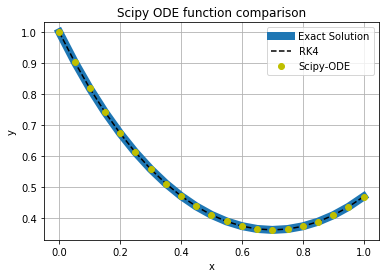

In [13]:
import time
import numpy as np
from scipy import integrate
from matplotlib.pylab import *
from IPython.core.display import HTML


x0 = 0
y0 = 1 
xf = 1.0
h = 0.05
edo = edoC
n = int(round(np.floor((xf - x0)/h)))+1

# Solution 'exact'
exact = []
for i in range(n): 
    x = x0 + h*i
    y = equationC_exact(x)
    exact.append(y)

tempo_scipy = time.time()
# Solution Scipy 
r = integrate.ode(edoC).set_integrator('vode', method='bdf')
r.set_initial_value([y0], x0)
domain_scipy = np.zeros((n, 1))
sol_scipy = np.zeros((n, 1))
domain_scipy[0] = x0
sol_scipy[0] = y0
k = 1

while r.successful() and k < n:
    r.integrate(r.t + h)
    domain_scipy[k] = r.t
    sol_scipy[k] = r.y[0]
    k += 1
tempo_scipy = time.time() - tempo_scipy

tempo_rk4_implementado = time.time()
t, rk4 = calculate_by_rk4(edo, x0, y0, h, n)
tempo_rk4_implementado = time.time() - tempo_rk4_implementado

_exact, = plt.plot(t, exact, label="Exact Solution", linewidth=8.0)
_rk4, = plt.plot(t, rk4, '--', label="RK4", color='black')
_sol_scipy, = plt.plot(t, sol_scipy, 'o', color="y", label="Scipy-ODE")

plt.title("Scipy ODE function comparison")
plt.legend(handles=[_exact, _rk4, _sol_scipy])
grid('on')
xlabel('x')
ylabel('y')
plt.show()
html = """
     <table style="border:none">
         <tr style="border:none">
             <th style="padding:20px; border:none; background-color:#f7f7f7;" colspan="4">
             <center> h = %.3f </center> """ %h + """
             </th>
         </tr>
         <tr style="border:none">
             <th style="padding:20px; border:none; background-color:#f7f7f7;">Method</th>
             <th style="padding:20px; border:none; background-color:#f7f7f7;">Precision (percentage)</th>
             <th style="padding:20px; border:none; background-color:#f7f7f7;"> absolut error </th>
             <th style="padding:20px; border:none; background-color:#f7f7f7;"> Time (seconds) </th>
         </tr>
         <tr style="border:none;">
             <td style="padding:20px; border:none;">Scipy-ODE</td>
             <td style="padding:20px; border:none;">%s</td>
             """ %str(calculate_precision(exact, sol_scipy)[0]) + """
             <td style="padding:20px; border:none;">%s</td>
             """ %str(calculate_absolute_error(exact, sol_scipy)[0]) + """
             <td style="padding:20px; border:none"> %f </td>""" %tempo_scipy + """
        <\tr>
        <tr style="border:none;">
             <td style="padding:20px; border:none;">RK4 Implemented</td>
             <td style="padding:20px; border:none;">%s</td> """ %str(calculate_precision(exact, rk4)) + """
             <td style="padding:20px; border:none;">%s</td> """ %str(calculate_absolute_error(exact, rk4)) + """
             <td style="padding:20px; border:none;"> %f </td>""" %tempo_rk4_implementado + """
        </tr>
        <tr style="border:none">
             <th style="padding:20px; border:none; background-color:#f7f7f7;">Results</th>
             <th style="padding:20px; border:none; background-color:#f7f7f7; color:green;">
                 %f """ %(calculate_precision(exact, rk4)-calculate_precision(exact, sol_scipy)[0])  + """ more eficient </th>
             <th style="padding:20px; border:none; background-color:#f7f7f7; color:green;">
                 %f """ %(calculate_absolute_error(exact, sol_scipy)[0]-calculate_absolute_error(exact, rk4))  + """ less </th>
             <th style="padding:20px; border:none; background-color:#f7f7f7; color:green;">
                 %f """ %(tempo_scipy-tempo_rk4_implementado) + """ faster
             </th>
         </tr>
     </table>"""
HTML(html)

<p style="text-align: justify; text-indent:4em">
Thus, for the ODE analyzed in this work, the implemented Runge-Kutta 4 method obtained a better performance than that of the ODE function of Scipy (with the defaults parameters) for step 0.5 in the interval 0-3. Achieving greater precision, with a smaller absolute error, also being more efficient with respect to time.
</p>

<h2>Ordinary Differential Equations of Order N</h2>
<p style="text-align: justify; text-indent:4em">
For the resolution of ordinary differential equations of order greater than 1, this ODE can be transformed into a system of differential equations of order 1. In this section, we used the ODE below.
</p>
\begin{align*} 
\left(
\begin{array}{c}
y^{''} = y + e^{x}\\
y(0) = 1 \\
y^{'}(0) = 0 
\end{array}
\right)
\end{align*}
<p style="text-align: center"> <strong>
EDO of ordem 2 - EDO2 A
</strong> </p>
<p style="text-align: justify; text-indent:4em">
One can use auxiliary variables that represent the derivatives, as follows:
</p>
\begin{align*} 
\left(
\begin{array}{c}
y_1 = y \\
y_2 = y^{'}\\
\end{array}
\right)
\end{align*}
<p style="text-align: justify; text-indent:4em">
Thus, the order 2 EDO can be written through the following order 1:
</p>
\begin{align*} 
\left(
\begin{array}{c}
y_1^{'} = y_2 = f1 \\
y_2{'} = y_1 + e^{x} = f2\\
y_1(0) = 1 \\
y_2(0) = 0 
\end{array}
\right)
\end{align*}
<p style="text-align: justify; text-indent:4em">
Similarly, one can do the same process for another order 2 ODE, as shown below:
</p>
\begin{align*} 
\left(
\begin{array}{c}
y^{''} = x + 1 \\
y(0) = 1 \\
y^{'}(0) = 0 
\end{array}
\right)
\end{align*}
<p style="text-align: center"> <strong>
EDO of ordem 2 - EDO2 B
</strong> </p>
<p style="text-align: justify; text-indent:4em"> In such a way that we have: </p>
\begin{align*} 
\left(
\begin{array}{c}
y_1 = y \\
y_2 = y^{'}
\end{array}
\right)
\end{align*}
<p style="text-align: justify; text-indent:4em">
And, finaly:
</p>
\begin{align*} 
\left(
\begin{array}{c}
y_1^{'} = y_2 = f1\\
y_2{'} = x + y_1 =f2\\
y_1(0) = 1 \\
y_2(0) = 0 
\end{array}
\right)
\end{align*}
<p style="text-align: justify; text-indent:4em">
The resolution efficacy of this numerical method can be compared with the following analytical solution:
</p>
\begin{align*} 
    y(x) = x^2 + 3x - 3
\end{align*}

<p style="text-align: justify; text-indent:4em">
Thus, these two order 2 ordinary equations were expressed in EDO systems of order 1. The two shifts that make up each system are represented in the cell below, as well as the exact solutions used to verify the prediction methods.
</p>

In [14]:
import numpy as np

#  A: y = y_2
def edo2A_f1(x, ydot):
    return ydot

#  A: y'_2 = y + e**x
def edo2A_f2(x, y):
    return y + np.exp(x)

#  Exact solution of EDO A, analyticallly obtained
def edo2A_exact(x):
    return (0.25*np.exp(x)) + (0.75 * np.exp(-x)) + (0.5*x*np.exp(x))


#  A: y = y_2
def edo2B_f1(x, ydot):
    return ydot

#  A: y'_2 = x +y
def edo2B_f2(x, y):
    return x + y

# Exact solution of EDO B, analyticallly obtained
def edo2B_exact(x):
    return np.exp(x) - x

<p style="text-align: justify; text-indent:4em">
In order to solve these systems of differential equations of order 1 that describe ODEs of order 2, a function was developed that receives as a parameter the system (the two equations), as well as the type of approximation (Euler, RK2, Rk3, RK4) and thus reused the approaches already developed in the previous section.
</p>

In [16]:
def edo2_aproximation(kind: str, f: list, x_0: float, y_0: float, ydot_0: float, h: float, n: int):
    image = [0]*n
    domain = [0]*n
    ydot = [0]*n
    
    domain[0] = x_0
    image[0] = y_0
    ydot[0] = ydot_0
    
    if kind == "euler":
        prediction = euler_prediction
    elif kind == "rk2":
        prediction = rk2_prediction
    elif kind == "rk3":
        prediction = rk3_prediction
    elif kind == "rk4":
        prediction = rk4_prediction
    
    aux = domain[0]
    for i in range(n-1):
        aux += h
        domain[i+1] = aux 
        image[i+1] = image[i] + prediction(f[0], domain[i], ydot[i], h)
        ydot[i+1] = ydot[i] + prediction(f[1], domain[i], image[i], h)

    return domain, image, ydot

# test
system = [edo2A_f1, edo2A_f2]
edo2_aproximation(kind="rk4", f=system, x_0=0, y_0=1, ydot_0=0, h=0.1, n=4)


([0, 0.1, 0.2, 0.30000000000000004],
 [1, 1.0, 1.022684061946882, 1.0692746040135033],
 [0, 0.21568776463894715, 0.442998696406209, 0.6855409161579555])

<h2>Results</h2>

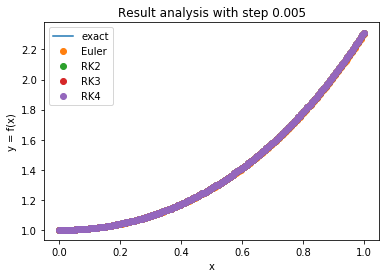

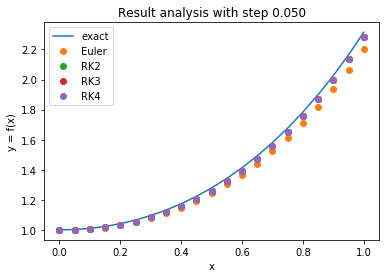

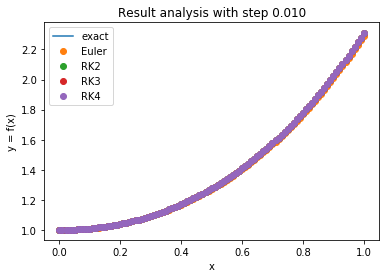

In [20]:
import matplotlib.pyplot as plt 

sistema = [edo2A_f1, edo2A_f2]

x0 = 0
y0 = 1
xf = 1
ydot0 = 0
splits = [0.005, 0.05, 0.01]

html = """"""
for split in splits:
    n = int(round(np.floor((xf - x0)/split)))+1

    x_euler, y_euler, ydot_euler = edo2_aproximation(kind="euler", f=system, 
                                                         x_0=x0, y_0=y0, ydot_0=ydot0, h=split, n=n)

    x_rk2, y_rk2, ydot_rk2 = edo2_aproximation(kind="rk2", f=system, 
                                                         x_0=x0, y_0=y0, ydot_0=ydot0, h=split, n=n)

    x_rk3, y_rk3, ydot_rk3 = edo2_aproximation(kind="rk2", f=system, 
                                                         x_0=x0, y_0=y0, ydot_0=ydot0, h=split, n=n)
    x_rk4, y_rk4, ydot_rk4 = edo2_aproximation(kind="rk4", f=system, 
                                                         x_0=x0, y_0=y0, ydot_0=ydot0, h=split, n=n)


    # Solucao 'exact'
    t = []
    exact_2order = []
    for i in range(n): 
        x = x0 + split*i
        y = edo2A_exact(x)
        exact_2order.append(y)
        t.append(x)


    # Plotagem dos resultados
    plt.title('Result analysis with step %.3f' %(split))
    plt.xlabel("x")
    plt.ylabel("y = f(x)")

    _exact02, = plt.plot(t, exact_2order, label="exact")
    _euler, = plt.plot(x_euler, y_euler, 'o', label="Euler")
    _rk2, = plt.plot(x_rk2, y_rk2, 'o', label="RK2")
    _rk3, = plt.plot(x_rk2, y_rk3, 'o', label="RK3")
    _rk4, = plt.plot(x_rk2, y_rk4, 'o', label="RK4")
    #

    plt.legend(handles=[_exact02, _euler, _rk2, _rk3, _rk4])
    plt.show()

    html += """
         <table style="border:none">
             <tr style="border:none">
                 <th style="padding:20px; border:none; background-color:#f7f7f7;" colspan="3">
                 <center> split = %.3f </center> """ %h + """
                 </th>
             </tr>
             <tr style="border:none">
                 <th style="padding:20px; border:none; background-color:#f7f7f7;">Method</th>
                 <th style="padding:20px; border:none; background-color:#f7f7f7;">Precision (percentage)</th>
                 <th style="padding:20px; border:none; background-color:#f7f7f7;">absolut error</th>
             </tr>
             <tr style="border:none;">
                 <td style="padding:20px; border:none;">Euler</td>
                 <td style="padding:20px; border:none; color:red;"> %f """ %calculate_precision(exact_2order, y_euler) + """ </td>
                 <td style="padding:20px; border:none; color:red;"> %f """ %calculate_absolute_error(exact_2order, y_euler) + """ </td>
             </tr>
             <tr style="border:none;">
                 <td style="padding:20px; border:none;">RK2</td>
                 <td style="padding:20px; border:none;"> %f """ %calculate_precision(exact_2order, y_rk2) + """ </td>
                 <td style="padding:20px; border:none;"> %f """ %calculate_absolute_error(exact_2order, y_rk2) + """ </td>
             </tr>
             <tr style="border:none;">
                 <td style="padding:20px; border:none;">RK3</td>
                 <td style="padding:20px; border:none;"> %f """ %calculate_precision(exact_2order, y_rk3) + """ </td>
                 <td style="padding:20px; border:none;"> %f """ %calculate_absolute_error(exact_2order, y_rk3) + """ </td>
             </tr>
             <tr style="border:none;">
                 <td style="padding:20px; border:none; color:green; font-weight:bold;">RK4</td>
                 <td style="padding:20px; border:none; color:green; font-weight:bold"> %f 
                 """ %calculate_precision(exact_2order, y_rk4) + """ </td>
                 <td style="padding:20px; border:none; color:green; font-weight:bold"> %f 
                 """ %calculate_absolute_error(exact_2order, y_rk4) + """ </td>
             </tr>
            """ 

HTML(html)



<h2>Conclusion</h2>

<p style="text-align: justify; text-indent:4em">
Through the present work, it was concluded that the numerical methods can provide approximations significantly close to the unknown functions of Differential Equations. The efficiency and effectiveness of these approaches are insin- tinsically related to the "step" between domain values. In addition, we compared the results obtained with the Runge-Kutta 4 method in the interval [0,1] with step 0.5 in the EDO 1 with the results from the ODE function of the scipy library - with defaults parameters (Adams method) . In this comparison, the implemented method was more efficient (approximation with less time spent), obtained a greater precision and a smaller absolute error.
</p>

<h2>References</h2>

<p>[1] https://www.ppgia.pucpr.br/~jamhour/Download/pub/MatComp/7.%20EquacoesDiferencaisOrdinarias.pdf </p>
<p>[2] http://www.mat.ufmg.br/~espec/Monografias_Noturna/Monografia_KarineNayara.pdf</p>
<p>[3] https://pt.wikipedia.org/wiki/M%C3%A9todo_de_passo_m%C3%BAltiplo</p>
<p>[4] http://members.tripod.com/tiago_pinho/trabalho2/metodos.pdf</p>


